### EDA, Visualizations and Further data engineering

#### Author: (EJ) Vivek Pandey

This notebook is to be run after the initial data engineering notebook.

In [1]:
# Dependency imports
import re
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
'''
sns.set_style({'axes.facecolor':'#E7E7F0', 'figure.facecolor':'white', \
               'axes.edgecolor': 'white', 'grid.color': 'white', \
              'axes.labelcolor': 'black', 'text.color': 'black', \
              'xtick.color': 'black', 'ytick.color': 'black'})
'''

# plotly standard imports
import plotly
plotly.tools.set_credentials_file(username='vivek.pandey', api_key='GcINHnvXXRBgEUUckTTf')

import plotly.graph_objs as go
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

# Cufflinks wrapper on plotly
import cufflinks

# Notebook customizations
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_colwidth = -1
import warnings
warnings.filterwarnings('ignore')

sns.axes_style()

{'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

### Properties EDA

In [2]:
properties_df = pd.read_csv("./output/engineered_trulia_properties.csv", sep="|", dtype={'zip_code': str}, encoding="latin1")
properties_df.head()

,address,area_sqft,basement_type,built_year,city,exterior_type,heating_type,lot_size,no_of_baths,no_of_bedrooms,no_of_parking_spaces,no_of_stories,parking_type,property_type,property_url,state,tax_amount,tax_year,zip_code
0,160 162 Old Peckslip Rd,1352.0,NaN,1985,Holmes,NaN,NaN,32234.4,3.0,3.0,NaN,NaN,NaN,Multi-Family,https://www.trulia.com/p/ny/holmes/160-162-old-peckslip-rd-holmes-ny-12531--2349467107,NY,7718.79,0,12531
1,10 Cliff Ct,1184.0,NaN,1997,Holmes,NaN,NaN,60984.0,2.5,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,NY,8320.40,2017,12531
2,26 Donovan Ln,1890.0,NaN,1992,Holmes,NaN,NaN,110206.8,2.5,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ny/holmes/26-donovan-ln-holmes-ny-12531--2349447123,NY,9260.24,2017,12531
3,3130 Grand Concourse #7R,103883.0,NaN,1955,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7r-bronx-ny-10458--2171936520,NY,NaN,2017,10468
4,3130 Grand Concourse #7S,103883.0,NaN,1955,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7s-bronx-ny-10458--2333495270,NY,NaN,2017,10458


In [3]:
properties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3439991 entries, 0 to 3439990
Data columns (total 19 columns):
address                 object
area_sqft               float64
basement_type           float64
built_year              int64
city                    object
exterior_type           float64
heating_type            float64
lot_size                float64
no_of_baths             float64
no_of_bedrooms          float64
no_of_parking_spaces    float64
no_of_stories           float64
parking_type            float64
property_type           object
property_url            object
state                   object
tax_amount              float64
tax_year                int64
zip_code                object
dtypes: float64(11), int64(2), object(6)
memory usage: 498.7+ MB


In [4]:
# Dropping columns that do not have any value for now
properties_df.drop(axis=0, inplace=True, columns=['basement_type', 'exterior_type', 'heating_type', \
                                                  'no_of_parking_spaces', 'no_of_stories', 'parking_type'])
properties_df.head()

,address,area_sqft,built_year,city,lot_size,no_of_baths,no_of_bedrooms,property_type,property_url,state,tax_amount,tax_year,zip_code
0,160 162 Old Peckslip Rd,1352.0,1985,Holmes,32234.4,3.0,3.0,Multi-Family,https://www.trulia.com/p/ny/holmes/160-162-old-peckslip-rd-holmes-ny-12531--2349467107,NY,7718.79,0,12531
1,10 Cliff Ct,1184.0,1997,Holmes,60984.0,2.5,3.0,Single-Family Home,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,NY,8320.40,2017,12531
2,26 Donovan Ln,1890.0,1992,Holmes,110206.8,2.5,3.0,Single-Family Home,https://www.trulia.com/p/ny/holmes/26-donovan-ln-holmes-ny-12531--2349447123,NY,9260.24,2017,12531
3,3130 Grand Concourse #7R,103883.0,1955,Bronx,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7r-bronx-ny-10458--2171936520,NY,NaN,2017,10468
4,3130 Grand Concourse #7S,103883.0,1955,Bronx,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7s-bronx-ny-10458--2333495270,NY,NaN,2017,10458


In [5]:
properties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3439991 entries, 0 to 3439990
Data columns (total 13 columns):
address           object
area_sqft         float64
built_year        int64
city              object
lot_size          float64
no_of_baths       float64
no_of_bedrooms    float64
property_type     object
property_url      object
state             object
tax_amount        float64
tax_year          int64
zip_code          object
dtypes: float64(5), int64(2), object(6)
memory usage: 341.2+ MB


### Analyze and fill missing data

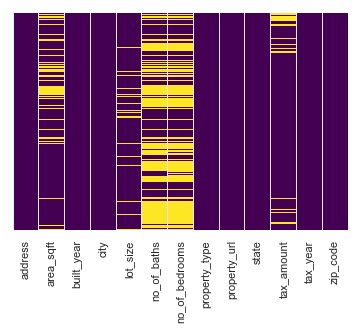

In [6]:
sns.heatmap(properties_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Lets look at how many rows have fully valid data
#### Right now, lets only keep entirely usable data and get to model training, we'll come back later for data imputation

In [7]:
properties_df = properties_df[~(properties_df['no_of_bedrooms'].isnull() | properties_df['no_of_baths'].isnull() | \
              (properties_df['no_of_bedrooms'] == 0) | (properties_df['no_of_baths'] == 0) | \
              (properties_df['built_year'] < 1500) | (properties_df['tax_year'] < 1800) | \
              properties_df['tax_amount'].isnull() | (properties_df['tax_amount'] < 10) | \
                properties_df['area_sqft'].isnull() | (properties_df['area_sqft'] < 100) | \
              properties_df['lot_size'].isnull() | (properties_df['lot_size'] < 100) | \
            properties_df['city'].isnull() | properties_df['zip_code'].isnull())]
properties_df

,address,area_sqft,built_year,city,lot_size,no_of_baths,no_of_bedrooms,property_type,property_url,state,tax_amount,tax_year,zip_code
1,10 Cliff Ct,1184.0,1997,Holmes,60984.0,2.5,3.0,Single-Family Home,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,NY,8320.40,2017,12531
2,26 Donovan Ln,1890.0,1992,Holmes,110206.8,2.5,3.0,Single-Family Home,https://www.trulia.com/p/ny/holmes/26-donovan-ln-holmes-ny-12531--2349447123,NY,9260.24,2017,12531
12,553 Grape Hollow Rd,1272.0,1955,Holmes,40075.2,2.0,3.0,Single-Family Home,https://www.trulia.com/p/ny/holmes/553-grape-hollow-rd-holmes-ny-12531--2305201702,NY,7221.77,2017,12531
13,59 Van De Carr Rd,768.0,1955,Craryville,6098.0,1.0,2.0,Single-Family Home,https://www.trulia.com/p/ny/craryville/59-van-de-carr-rd-craryville-ny-12521--2011547953,NY,1473.62,2017,12521
14,55 Van De Carr Rd,888.0,1951,Craryville,9148.0,1.0,2.0,Single-Family Home,https://www.trulia.com/p/ny/craryville/55-van-de-carr-rd-craryville-ny-12521--2011547934,NY,2129.89,2017,12521
16,126 Taghkanic Churchtown Rd,2775.0,1992,Craryville,510087.6,2.5,3.0,Farm/Ranch,https://www.trulia.com/p/ny/craryville/126-taghkanic-churchtown-rd-craryville-ny-12521--2349607986,NY,12348.22,2017,12521
17,110 Taghkanic Churchtown Rd,1619.0,2003,Craryville,384199.2,2.0,2.0,Single-Family Home,https://www.trulia.com/p/ny/craryville/110-taghkanic-churchtown-rd-craryville-ny-12521--2011547172,NY,10644.01,2017,12521
20,311 Taghkanic Churchtown Rd,1872.0,1990,Craryville,198198.0,1.0,4.0,Single-Family Home,https://www.trulia.com/p/ny/craryville/311-taghkanic-churchtown-rd-craryville-ny-12521--2158455139,NY,7563.77,2017,12521
22,12 Taghkanic Churchtown Rd,1708.0,1998,Craryville,274428.0,1.0,2.0,Single-Family Home,https://www.trulia.com/p/ny/craryville/12-taghkanic-churchtown-rd-craryville-ny-12521--2158455187,NY,5769.40,2017,12521
23,11 Taghkanic Churchtown Rd,1728.0,2007,Craryville,249163.2,2.5,3.0,Single-Family Home,https://www.trulia.com/p/ny/craryville/11-taghkanic-churchtown-rd-craryville-ny-12521--1100838069,NY,5270.54,2017,12521


#### We've dropped about half the records here, so data imputation is really important for the future to be able to use that data

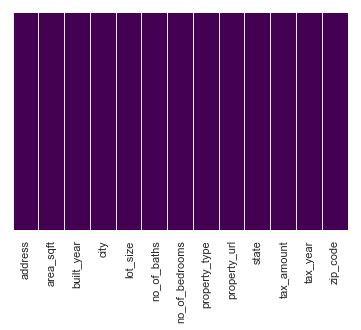

In [8]:
sns.heatmap(properties_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Lets look at the distribution of data in the columns to see come up with close values for imputation

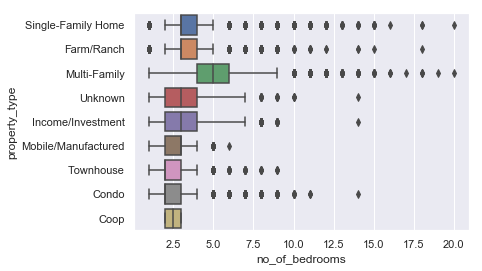

In [9]:
sns.boxplot(data=properties_df[~properties_df['no_of_bedrooms'].isnull() & (properties_df['no_of_bedrooms'] > 0)], \
            x='no_of_bedrooms', y='property_type')

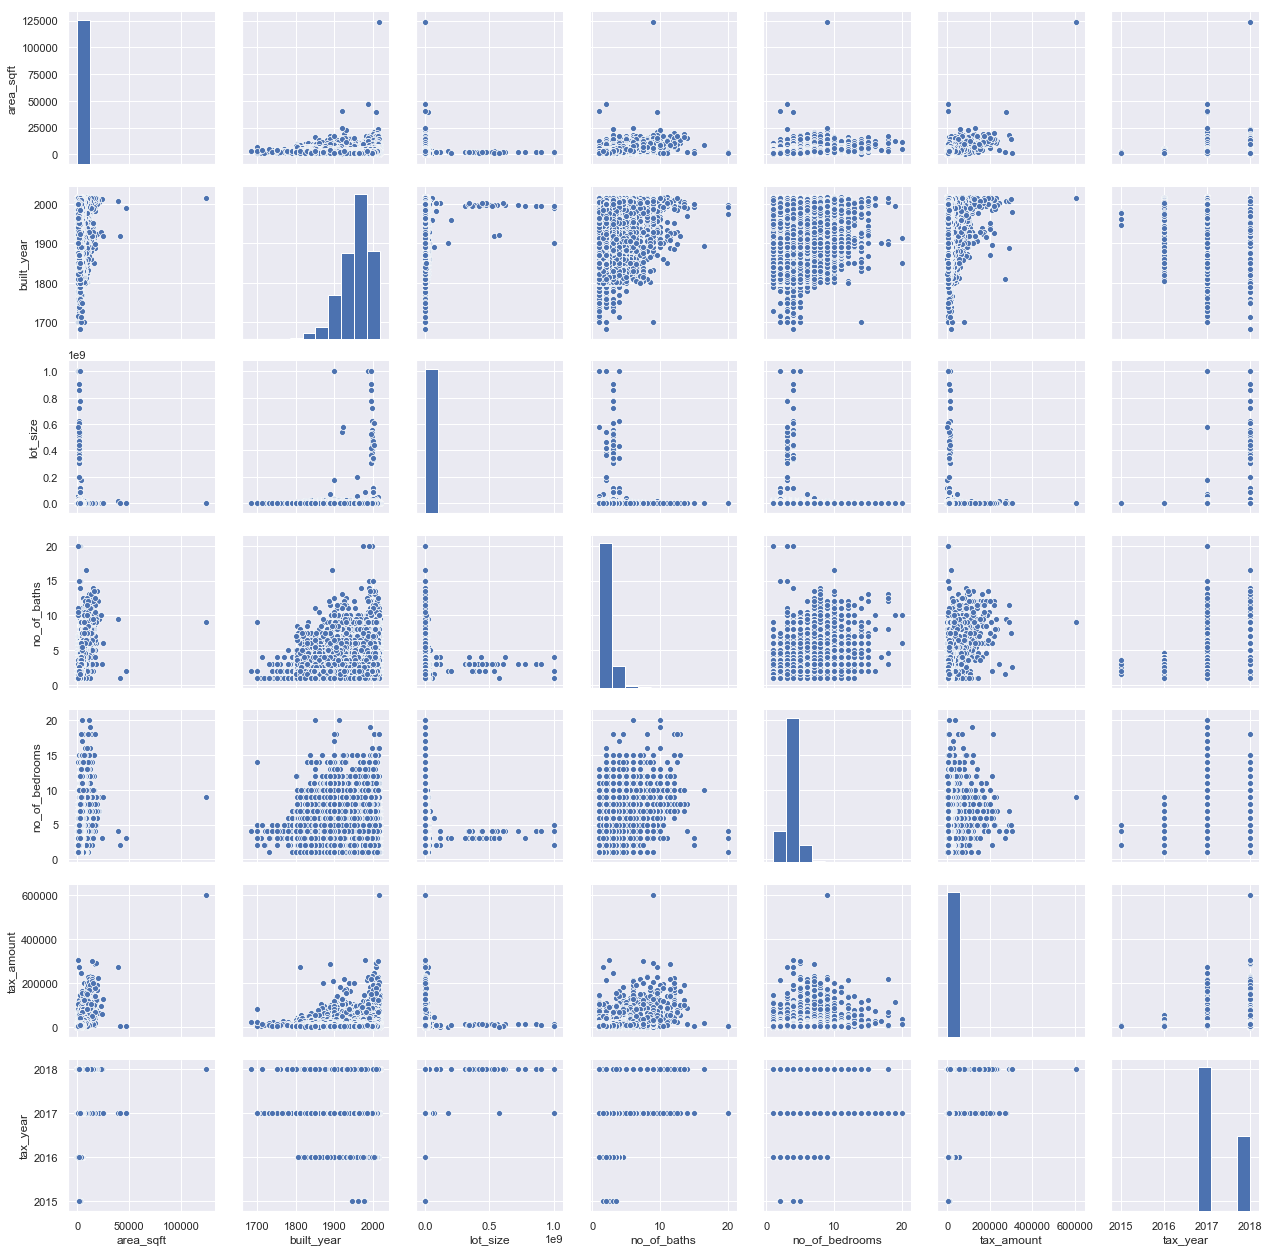

In [10]:
sns.pairplot(data=properties_df[['area_sqft', 'built_year', 'lot_size', 'no_of_baths', 'no_of_bedrooms', \
                                 'tax_amount', 'tax_year']])

### This subsection to prevent having to re-run the notebook from above

In [11]:
properties_temp = properties_df

In [12]:
properties_df = properties_temp

#### Find and remove outliers

In [13]:
properties_q1 = properties_df.quantile(0.25)
properties_q3 = properties_df.quantile(0.75)
properties_iqr = properties_q3 - properties_q1

print (properties_q3)
print ('----------------')
print (properties_q1)
print ('----------------')
print (properties_iqr)

area_sqft         2192.00 
built_year        1982.00 
lot_size          41382.00
no_of_baths       2.50    
no_of_bedrooms    4.00    
tax_amount        7811.69 
tax_year          2018.00 
Name: 0.75, dtype: float64
----------------
area_sqft         1250.000
built_year        1930.000
lot_size          7677.000
no_of_baths       1.000   
no_of_bedrooms    3.000   
tax_amount        3154.335
tax_year          2017.000
Name: 0.25, dtype: float64
----------------
area_sqft         942.000  
built_year        52.000   
lot_size          33705.000
no_of_baths       1.500    
no_of_bedrooms    1.000    
tax_amount        4657.355 
tax_year          1.000    
dtype: float64


Some columns within a limited range might be better off without outlier filtering to prevent losing large amount of data, so remove the ones from the IQR series that we don't want to filter outliers for.

Also, adjust the weights to multiply the individual column IQR's by, to prevent overfiltering or underfiltering.
To gauge this, look at the pairplot above to get an idea of the data, and also the various quartiles calculated.

In [14]:
properties_iqr = properties_iqr.drop(labels=['built_year', 'tax_year'])
properties_iqr

area_sqft         942.000  
lot_size          33705.000
no_of_baths       1.500    
no_of_bedrooms    1.000    
tax_amount        4657.355 
dtype: float64

In [15]:
prop_high_outlier_wts = {
    'area_sqft': 14,
    'lot_size': 120,
    'no_of_baths': 7,
    'no_of_bedrooms': 11,
    'tax_amount': 20
}

prop_low_outlier_wts = {
    'area_sqft': 1.5,
    'lot_size': 1.5,
    'no_of_baths': 1.5,
    'no_of_bedrooms': 2,
    'tax_amount': 0.5
}

In [16]:
for index, value in properties_iqr.items():
    print(index, value)
    # Select only the records that fall within the valid range, automatically ignores outliers
    properties_df = properties_df[(properties_df[index] >= (properties_q1[index] - 1.5 * properties_iqr[index])) & \
                                  (properties_df[index] <= (properties_q3[index] + 1.5 * properties_iqr[index]))]
    print(properties_df.shape)

area_sqft 942.0
(1445691, 13)
lot_size 33705.0
(1278641, 13)
no_of_baths 1.5
(1276444, 13)
no_of_bedrooms 1.0
(1204420, 13)
tax_amount 4657.355
(1177542, 13)


In [17]:
properties_df.reset_index(drop=True, inplace=True)
properties_df.head()

,address,area_sqft,built_year,city,lot_size,no_of_baths,no_of_bedrooms,property_type,property_url,state,tax_amount,tax_year,zip_code
0,10 Cliff Ct,1184.0,1997,Holmes,60984.0,2.5,3.0,Single-Family Home,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,NY,8320.40,2017,12531
1,553 Grape Hollow Rd,1272.0,1955,Holmes,40075.2,2.0,3.0,Single-Family Home,https://www.trulia.com/p/ny/holmes/553-grape-hollow-rd-holmes-ny-12531--2305201702,NY,7221.77,2017,12531
2,59 Van De Carr Rd,768.0,1955,Craryville,6098.0,1.0,2.0,Single-Family Home,https://www.trulia.com/p/ny/craryville/59-van-de-carr-rd-craryville-ny-12521--2011547953,NY,1473.62,2017,12521
3,55 Van De Carr Rd,888.0,1951,Craryville,9148.0,1.0,2.0,Single-Family Home,https://www.trulia.com/p/ny/craryville/55-van-de-carr-rd-craryville-ny-12521--2011547934,NY,2129.89,2017,12521
4,52 Two Town Rd,1350.0,1992,Craryville,39639.6,1.5,2.0,Single-Family Home,https://www.trulia.com/p/ny/craryville/52-two-town-rd-craryville-ny-12521--2011547915,NY,3074.64,2017,12521


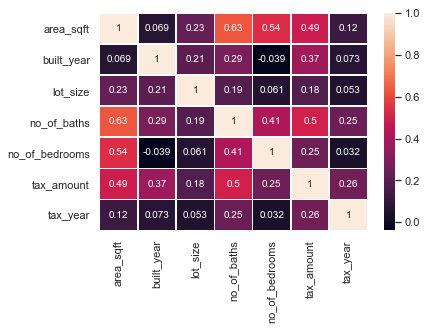

In [18]:
sns.heatmap(data=properties_df.corr(), linewidths=0.5, annot=True)

### High and medium correlated features from Properties

* area_sqft vs. no_of_baths (0.74)
* area_sqft vs. tax_amount (0.66)
* no_of_baths vs. tax_amount (0.61)
* area_sqft vs. no_of_bedrooms (0.58)
* no_of_bedrooms vs no_of_baths (0.49)

### Replotting relationships after removing outliers

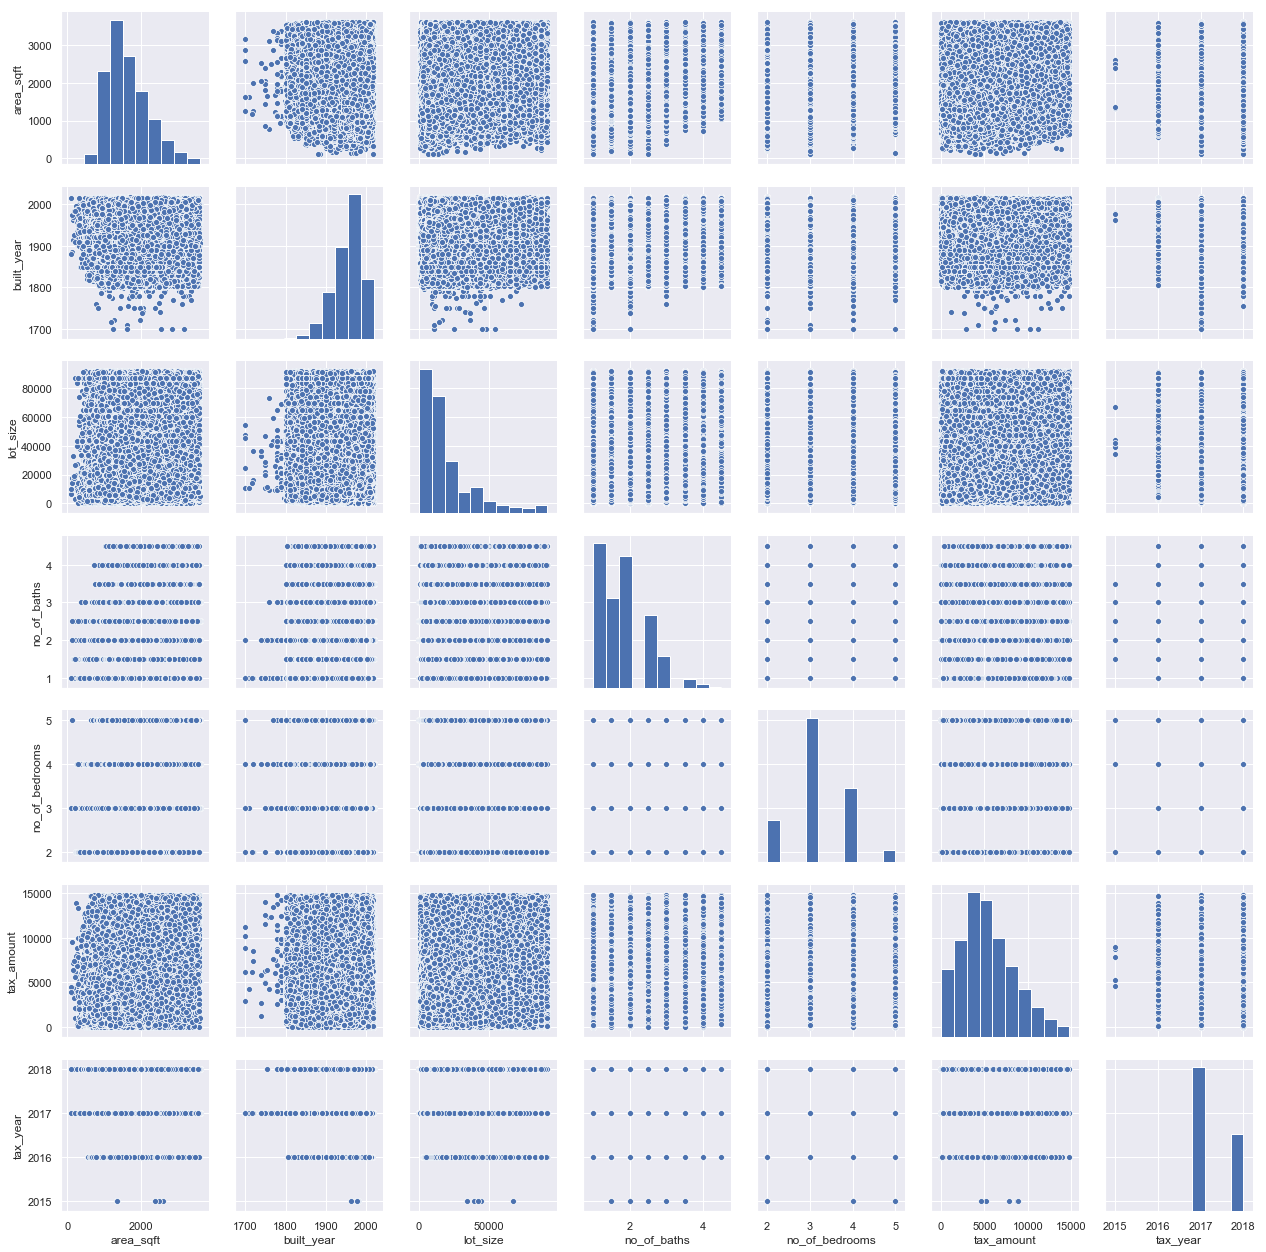

In [19]:
sns.pairplot(data=properties_df[['area_sqft', 'built_year', 'lot_size', 'no_of_baths', 'no_of_bedrooms', \
                                 'tax_amount', 'tax_year']])

In [20]:
properties_df = properties_df.drop_duplicates()
properties_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1177542 entries, 0 to 1177541
Data columns (total 13 columns):
address           1177542 non-null object
area_sqft         1177542 non-null float64
built_year        1177542 non-null int64
city              1177542 non-null object
lot_size          1177542 non-null float64
no_of_baths       1177542 non-null float64
no_of_bedrooms    1177542 non-null float64
property_type     1177542 non-null object
property_url      1177542 non-null object
state             1177542 non-null object
tax_amount        1177542 non-null float64
tax_year          1177542 non-null int64
zip_code          1177542 non-null object
dtypes: float64(5), int64(2), object(6)
memory usage: 125.8+ MB


### Plotting in US Map
#### Convert the cell types to Code to use it

Making a new column with a default value of one, so its value can be passed to map

properties_df_for_map = properties_df
properties_df_for_map['z'] = 1

properties_map_data = dict(type='choropleth',
            colorscale = 'YlOrRd',
            locations = properties_df_for_map['state'],
            z = properties_df_for_map['z'],
            locationmode = 'USA-states',
            text = properties_df_for_map['state'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Properties in US"}
            ) 

properties_map_layout = dict(title = 'US Properties by State',
                              geo = dict(scope='usa',
                                         showlakes = True,
                                         lakecolor = 'rgb(85,173,240)')
                             )

properties_choromap = go.Figure(data=[properties_map_data], layout=properties_map_layout)

In [21]:
'''
DO NOT UNCOMMENT, THE NOTEBOOK WILL FREEZE AND CRASH WHILE RENDERING THIS MAP
iplot(properties_choromap)
'''

'\nDO NOT UNCOMMENT, THE NOTEBOOK WILL FREEZE AND CRASH WHILE RENDERING THIS MAP\niplot(properties_choromap)\n'

### Transactions EDA

In [22]:
transactions_df = pd.read_csv("./output/engineered_trulia_transactions.csv", sep="|", parse_dates=['recording_date', 'contract_date'], \
                              encoding="latin1")
transactions_df.head()

,contract_date,county_transfer_tax,document_type,price,property_url,recording_date,total_transfer_tax,transaction_type
0,1995-11-17,NaN,Deed,146796.0,https://www.trulia.com/p/ny/holmes/160-162-old-peckslip-rd-holmes-ny-12531--2349467107,1995-12-12,NaN,Purchase/Resale Arm's Length Residential Transaction
1,2001-06-25,NaN,Deed,224000.0,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,2001-07-30,NaN,Purchase/Resale Arm's Length Residential Transaction
2,2013-09-19,NaN,Deed,70000.0,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,2013-09-19,NaN,Insured Non-Residential Grant Deed
3,2006-12-28,NaN,Deed,42500.0,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,2007-01-03,NaN,Insured Non-Residential Grant Deed
4,2018-11-08,NaN,Deed,325000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,2018-11-27,NaN,Purchase/Resale Arm's Length Residential Transaction


In [23]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3358672 entries, 0 to 3358671
Data columns (total 8 columns):
contract_date          datetime64[ns]
county_transfer_tax    float64
document_type          object
price                  float64
property_url           object
recording_date         datetime64[ns]
total_transfer_tax     float64
transaction_type       object
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 205.0+ MB


In [24]:
transactions_df.describe()

,county_transfer_tax,price,total_transfer_tax
count,281330.000000,3.358672e+06,1.076604e+06
mean,947.468318,2.958757e+05,1.558834e+03
std,3139.893910,2.138053e+06,3.742335e+03
min,0.000000,1.000000e+00,0.000000e+00
25%,225.000000,1.040000e+05,3.130000e+02
50%,502.000000,1.946995e+05,7.750000e+02
75%,975.000000,3.499000e+05,1.575000e+03
max,99750.000000,1.850000e+09,9.968800e+04


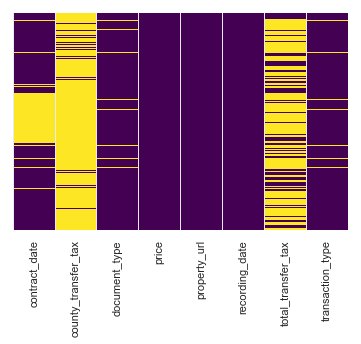

In [25]:
sns.heatmap(transactions_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### Dropping the county_transfer_tax and total_transfer_tax columns cause they are heavily nulls and removing rows that have incomplete data cause they are few

In [26]:
transactions_df = transactions_df.drop(columns=['county_transfer_tax', 'total_transfer_tax'], axis=1)
transactions_df.head()

,contract_date,document_type,price,property_url,recording_date,transaction_type
0,1995-11-17,Deed,146796.0,https://www.trulia.com/p/ny/holmes/160-162-old-peckslip-rd-holmes-ny-12531--2349467107,1995-12-12,Purchase/Resale Arm's Length Residential Transaction
1,2001-06-25,Deed,224000.0,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,2001-07-30,Purchase/Resale Arm's Length Residential Transaction
2,2013-09-19,Deed,70000.0,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,2013-09-19,Insured Non-Residential Grant Deed
3,2006-12-28,Deed,42500.0,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,2007-01-03,Insured Non-Residential Grant Deed
4,2018-11-08,Deed,325000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,2018-11-27,Purchase/Resale Arm's Length Residential Transaction


In [27]:
transactions_df = transactions_df[~(transactions_df['contract_date'].isnull() | \
                                    transactions_df['document_type'].isnull() | \
                                   transactions_df['transaction_type'].isnull() | \
                                   (transactions_df['price'] < 1000))]
transactions_df.shape

(2453848, 6)

In [28]:
transactions_df['recording_year'] = transactions_df['recording_date'].dt.year
transactions_df['recording_month'] = transactions_df['recording_date'].dt.month
transactions_df['recording_day'] = transactions_df['recording_date'].dt.day
transactions_df['contract_year'] = transactions_df['contract_date'].dt.year
transactions_df['contract_month'] = transactions_df['contract_date'].dt.month
transactions_df['contract_day'] = transactions_df['contract_date'].dt.day

transactions_df = transactions_df.drop(columns=['recording_date', 'contract_date'], axis=1)
transactions_df.head()

,document_type,price,property_url,transaction_type,recording_year,recording_month,recording_day,contract_year,contract_month,contract_day
0,Deed,146796.0,https://www.trulia.com/p/ny/holmes/160-162-old-peckslip-rd-holmes-ny-12531--2349467107,Purchase/Resale Arm's Length Residential Transaction,1995,12,12,1995,11,17
1,Deed,224000.0,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,Purchase/Resale Arm's Length Residential Transaction,2001,7,30,2001,6,25
2,Deed,70000.0,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,Insured Non-Residential Grant Deed,2013,9,19,2013,9,19
3,Deed,42500.0,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,Insured Non-Residential Grant Deed,2007,1,3,2006,12,28
4,Deed,325000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,Purchase/Resale Arm's Length Residential Transaction,2018,11,27,2018,11,8


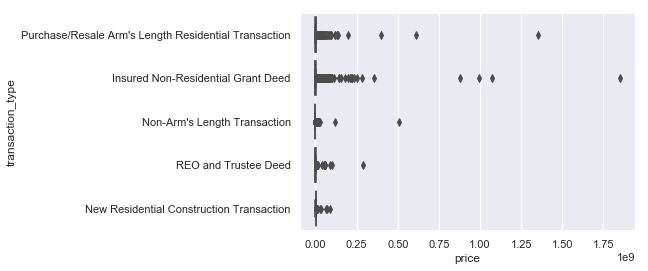

In [29]:
sns.boxplot(data=transactions_df, x='price', y='transaction_type')

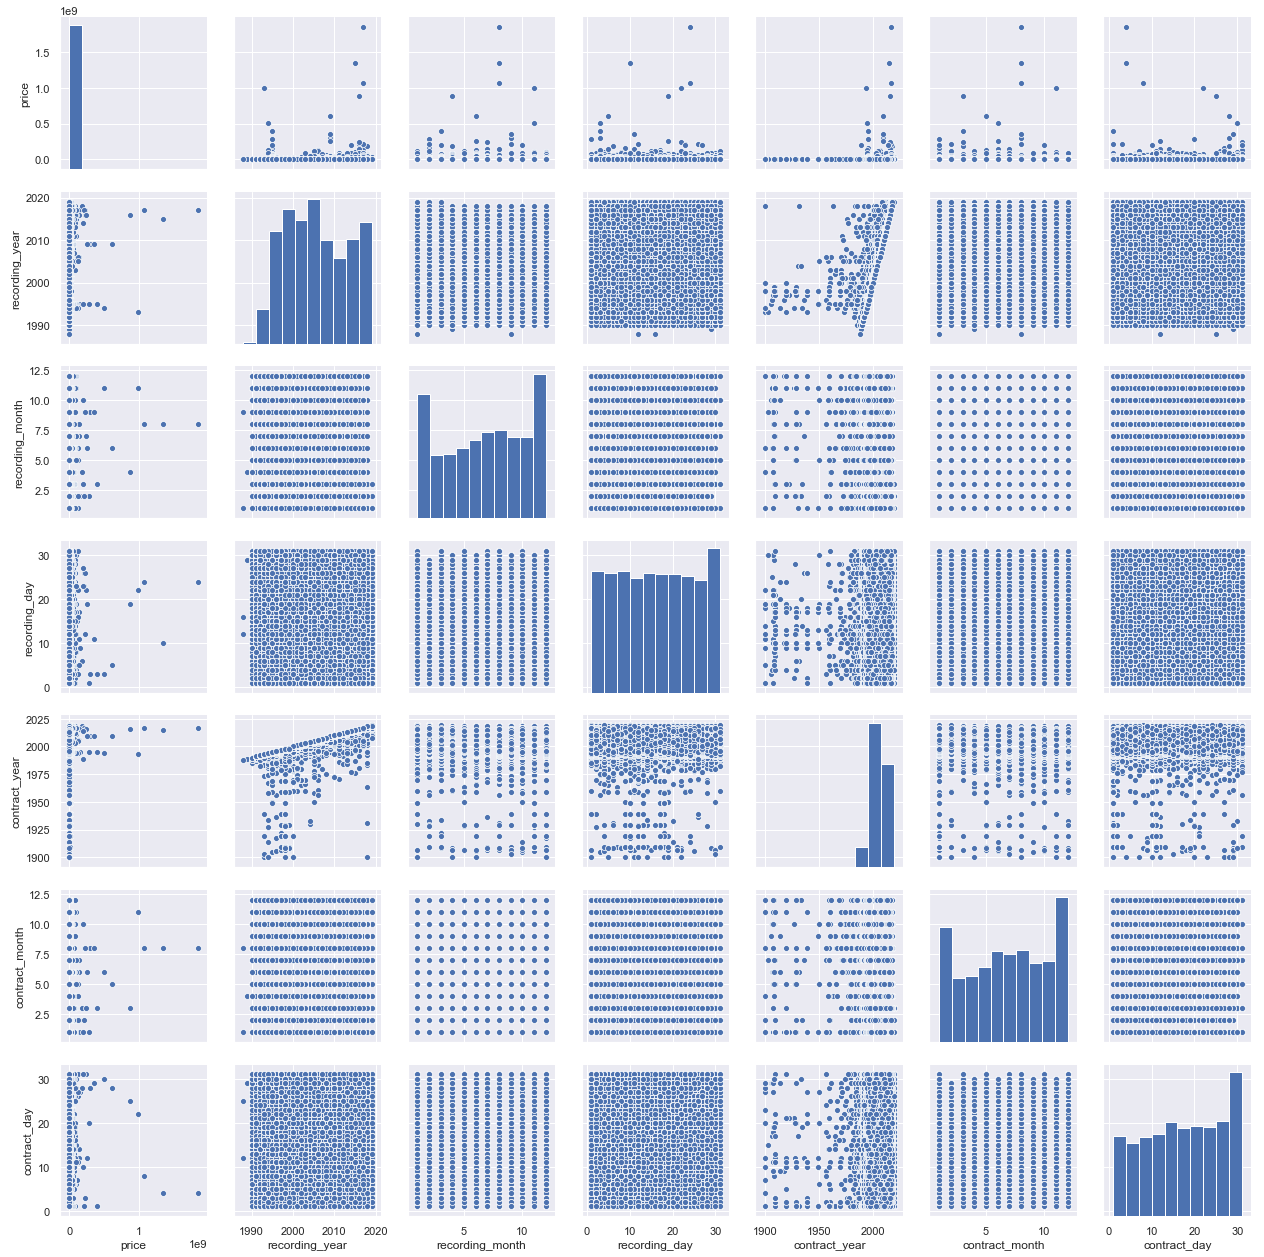

In [30]:
sns.pairplot(data=transactions_df)

### This subsection to prevent having to re-run the notebook from above

In [31]:
transactions_temp = transactions_df

In [32]:
transactions_df = transactions_temp

### Find, analyze and remove outliers in transaction data

In [33]:
transactions_q1 = transactions_df.quantile(0.25)
transactions_q3 = transactions_df.quantile(0.75)
transactions_iqr = transactions_q3 - transactions_q1

print (transactions_q3)
print ('----------------')
print (transactions_q1)
print ('----------------')
print (transactions_iqr)

price              356000.0
recording_year     2012.0  
recording_month    10.0    
recording_day      23.0    
contract_year      2012.0  
contract_month     10.0    
contract_day       25.0    
Name: 0.75, dtype: float64
----------------
price              98500.0
recording_year     2000.0 
recording_month    4.0    
recording_day      8.0    
contract_year      2000.0 
contract_month     4.0    
contract_day       9.0    
Name: 0.25, dtype: float64
----------------
price              257500.0
recording_year     12.0    
recording_month    6.0     
recording_day      15.0    
contract_year      12.0    
contract_month     6.0     
contract_day       16.0    
dtype: float64


Some columns within a limited range might be better off without outlier filtering to prevent losing large amount of data, so remove the ones from the IQR series that we don't want to filter outliers for.

Also, adjust the weights to multiply the individual column IQR's by, to prevent overfiltering or underfiltering.
To gauge this, look at the pairplot above to get an idea of the data, and also the various quartiles calculated.

In [34]:
transactions_iqr = transactions_iqr.drop(labels=['recording_month', 'recording_day', 'contract_month', 'contract_day'])
transactions_iqr

price             257500.0
recording_year    12.0    
contract_year     12.0    
dtype: float64

In [35]:
transactions_df.shape

(2453848, 10)

In [36]:
transactions_df[transactions_df['price'] > 1000000].shape

(50138, 10)

In [37]:
transactions_df[transactions_df['price'] < 10000].shape

(58717, 10)

It is important to adjust the weights for the outliers based on the Q1, Q3 and IQR values retrieved above to ensure we filter just the right number of outliers

In [38]:
txn_high_outlier_wts = {
    'price': 3,
    'recording_year': 0.6,
    'contract_year': 0.6
}

txn_low_outlier_wts = {
    'price': 0.28,
    'recording_year': 1.2,
    'contract_year': 1.2
}

In [39]:
for index, value in transactions_iqr.items():
    print(index, value)
    # Select only the records that fall within the valid range, automatically ignores outliers
    transactions_df = transactions_df[(transactions_df[index] >= (transactions_q1[index] - 1.5 * transactions_iqr[index])) & \
                                  (transactions_df[index] <= (transactions_q3[index] + 1.5 * transactions_iqr[index]))]
    print(transactions_df.shape)

price 257500.0
(2334236, 10)
recording_year 12.0
(2334236, 10)
contract_year 12.0
(2334011, 10)


In [40]:
transactions_df.reset_index(drop=True, inplace=True)
transactions_df.shape

(2334011, 10)

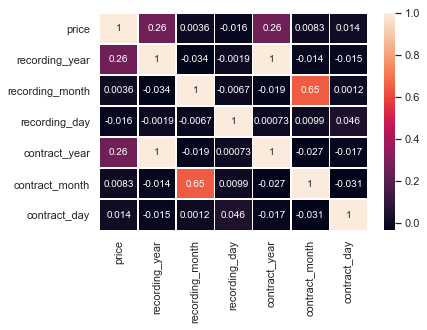

In [41]:
sns.heatmap(data=transactions_df.corr(), linewidths=0.5, annot=True)

### High and medium correlated features from Transactions

* recording_year vs. contract_year (1)
* recording_month vs. contract_month (0.66)

### Replotting relationships after removing outliers

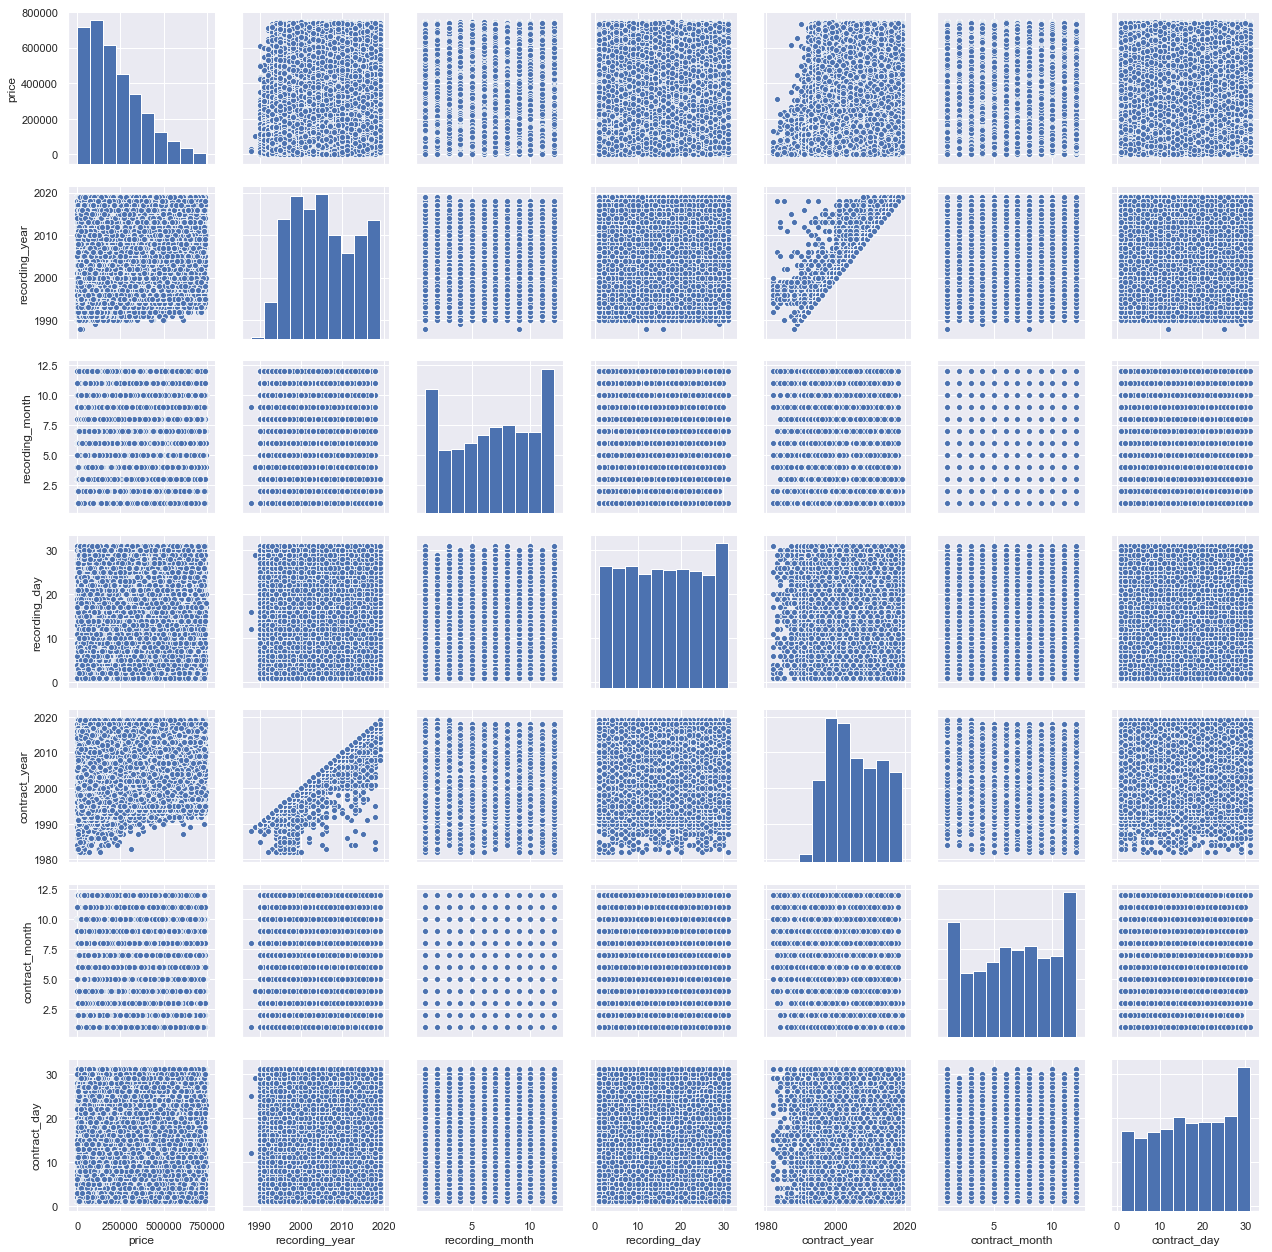

In [42]:
sns.pairplot(data=transactions_df)

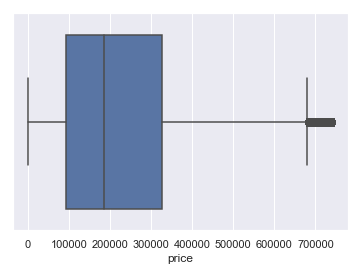

In [43]:
sns.boxplot(data=transactions_df, x='price')

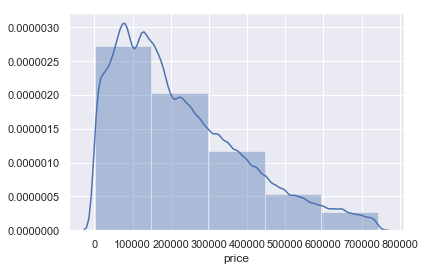

In [44]:
sns.distplot(transactions_df['price'], bins=5)

### Playin around with plot.ly

transactions_df[['price', 'total_transfer_tax']].iplot(kind='box')

transactions_df['price'].iplot(kind='hist', xTitle='price', yTitle='count', title='Price Distribution')

transactions_matrix_fig = ff.create_scatterplotmatrix(transactions_df[['price', 'total_transfer_tax', \
                                                                       'county_transfer_tax']], diag='histogram')
py.iplot(transactions_matrix_fig)

transactions_df[transactions_df['price'] == transactions_df['price'].max()]

### Enriching transactions data with properties data

In [45]:
transactions_master_df = pd.merge(transactions_df, properties_df, how='inner', on=['property_url'])
print(transactions_master_df.shape)
transactions_master_df.head()

(788150, 22)


,document_type,price,property_url,transaction_type,recording_year,recording_month,recording_day,contract_year,contract_month,contract_day,address,area_sqft,built_year,city,lot_size,no_of_baths,no_of_bedrooms,property_type,state,tax_amount,tax_year,zip_code
0,Deed,224000.0,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,Purchase/Resale Arm's Length Residential Transaction,2001,7,30,2001,6,25,10 Cliff Ct,1184.0,1997,Holmes,60984.0,2.5,3.0,Single-Family Home,NY,8320.40,2017,12531
1,REO Resale,55000.0,https://www.trulia.com/p/ny/craryville/52-two-town-rd-craryville-ny-12521--2011547915,Purchase/Resale Arm's Length Residential Transaction,2017,5,24,2017,5,10,52 Two Town Rd,1350.0,1992,Craryville,39639.6,1.5,2.0,Single-Family Home,NY,3074.64,2017,12521
2,REO Repossession,137337.0,https://www.trulia.com/p/ny/craryville/52-two-town-rd-craryville-ny-12521--2011547915,REO and Trustee Deed,2015,11,20,2015,10,6,52 Two Town Rd,1350.0,1992,Craryville,39639.6,1.5,2.0,Single-Family Home,NY,3074.64,2017,12521
3,Deed,50000.0,https://www.trulia.com/p/ny/craryville/48-van-de-carr-rd-craryville-ny-12521--2158446804,Purchase/Resale Arm's Length Residential Transaction,1996,7,30,1996,7,9,48 Van De Carr Rd,961.0,1951,Craryville,20908.8,1.0,2.0,Single-Family Home,NY,2701.22,2017,12521
4,REO Resale,99900.0,https://www.trulia.com/p/ny/craryville/20-van-de-carr-rd-craryville-ny-12521--2011547529,Purchase/Resale Arm's Length Residential Transaction,2010,12,20,2010,12,15,20 Van De Carr Rd,1236.0,1957,Craryville,14810.4,2.0,2.0,Single-Family Home,NY,3879.47,2017,12521


### Exporting to continue in another notebook

In [46]:
transactions_master_df.to_csv("output/post_eda_transactions_master.csv", sep='|', index=False, quoting=csv.QUOTE_NONE)